# Clustering jerárquico y dendogramas

Antes de empezar, pongamos un poco de notación.

* `X`: dataset (array de `n·m`) de puntos a clusterizar
* `n`: número de datos (**filas**)
* `m`: número de rasgos (**columnas**)
* `Z`: array de enlace del cluster con la información de las uniones
* `k`: número de clusters

In [26]:
import matplotlib.pyplot as plt
from scipy.cluster.hierarchy import dendrogram, linkage
import numpy as np

Generamos los datos con los que vamos a trabajar.

(150, 2)


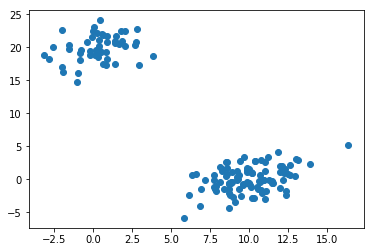

In [28]:
np.random.seed(4711)
# 100 datos con una normal de media (10,0); y sd de 3 en hz y 4 en vertical
a = np.random.multivariate_normal([10,0],[[3,1],[1,4]],size = [100,])
# 50 datos con una normal de media (0,20); y sd de 3 en hz y 4 en vertical
b = np.random.multivariate_normal([0,20],[[3,1],[1,4]], size = [50,])
X = np.concatenate((a,b))
print(X.shape)
plt.scatter(X[:,0],X[:,1])
plt.show()

Ahora creamos la matriz de grupos y enlaces con `linkage`.

In [27]:
Z = linkage(X, 'ward')

Antes de continuar, debemos comprobar el coeficiente de correlación cofenético utilizando la función `cophenet`. Este coeficiente compara las distancias 2 a 2 de las muestras con las que se han llevado a cabo en el clústering jerárquico.

* Cuanto más cercano sea el valor a 1, mejor será el cñustering ya que preservará las distancias originales que hubiera entre las diferentes observacioens

In [29]:
from scipy.cluster.hierarchy import cophenet
from scipy.spatial.distance import pdist

In [30]:
c, coph_dist = cophenet(Z, pdist(X))
c

0.9800148387574268

In [31]:
Z

array([[5.20000000e+01, 5.30000000e+01, 4.15105485e-02, 2.00000000e+00],
       [1.40000000e+01, 7.90000000e+01, 5.91375926e-02, 2.00000000e+00],
       [3.30000000e+01, 6.80000000e+01, 7.10677929e-02, 2.00000000e+00],
       [1.70000000e+01, 7.30000000e+01, 7.13712071e-02, 2.00000000e+00],
       [1.00000000e+00, 8.00000000e+00, 7.54313099e-02, 2.00000000e+00],
       [8.50000000e+01, 9.50000000e+01, 1.09277896e-01, 2.00000000e+00],
       [1.08000000e+02, 1.31000000e+02, 1.10071548e-01, 2.00000000e+00],
       [9.00000000e+00, 6.60000000e+01, 1.13022407e-01, 2.00000000e+00],
       [1.50000000e+01, 6.90000000e+01, 1.14289714e-01, 2.00000000e+00],
       [6.30000000e+01, 9.80000000e+01, 1.21200766e-01, 2.00000000e+00],
       [1.07000000e+02, 1.15000000e+02, 1.21671017e-01, 2.00000000e+00],
       [6.50000000e+01, 7.40000000e+01, 1.24900190e-01, 2.00000000e+00],
       [5.80000000e+01, 6.10000000e+01, 1.40277358e-01, 2.00000000e+00],
       [6.20000000e+01, 1.52000000e+02, 1.72599535e

Nuestro set de datos está comprendido en el rango \[0,149\]. Este rango determina el indexado de los datos, y en el array Z, son los dos primeros valores que aparecen para cada conjunto dentro de Z. 

Cuando ocurre que uno de estos índices, p.ej. en `Z[152]`, es porque se trata de uno de los grupos que se ha generado a la hora de realizar el clustering. 

Si queremos acceder a los componentes de este grupo lo que haremos será acceder en Z a la posición `152-len(X)`.

In [32]:
Z[152-len(X)]

array([33.        , 68.        ,  0.07106779,  2.        ])

Vemos que para el grupo 152, el clustering ha elegido a los puntos 33 y 68; y estos los había juntado con el punto 62. 

Para saber si esto es correcto, podemos comprobarlo de manera que si vemos estos valores del dataset, estos deben ser valores parecidos.

In [33]:
X[[33,62,68]]

array([[ 9.83913054, -0.48729797],
       [ 9.97792822, -0.56383202],
       [ 9.8934927 , -0.44152257]])

Otra forma será pintando estos valores de un color diferente en el plot para asegurarnos de que son puntos cercanos entre sí.

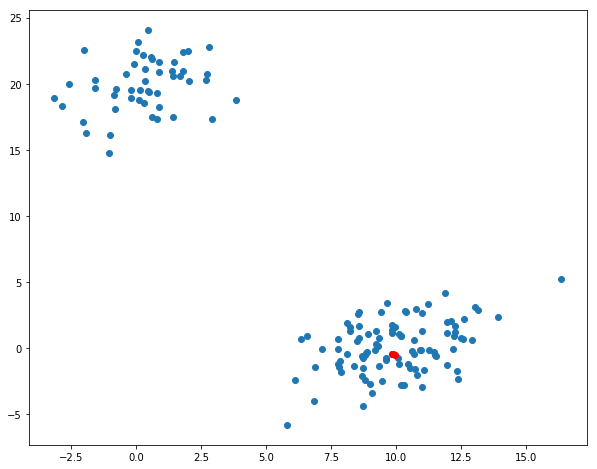

In [36]:
idx = [33,62,68]
plt.figure(figsize=(10,8))
plt.scatter(X[:,0],X[:,1]) # pintar todos los puntos
plt.scatter(X[idx,0], X[idx,1], c = 'r') # pintar los valores a comprobar
plt.show()

Y vemos como los puntos son realmente cercanos.

El siguiente que podemos investigar de Z es el `158`.

In [38]:
print(Z[158-len(X)])

[15.         69.          0.11428971  2.        ]


In [39]:
X[[15,69,41]]

array([[ 8.72437412, -0.73101911],
       [ 8.69529949, -0.62048946],
       [ 8.81582877, -0.56394025]])

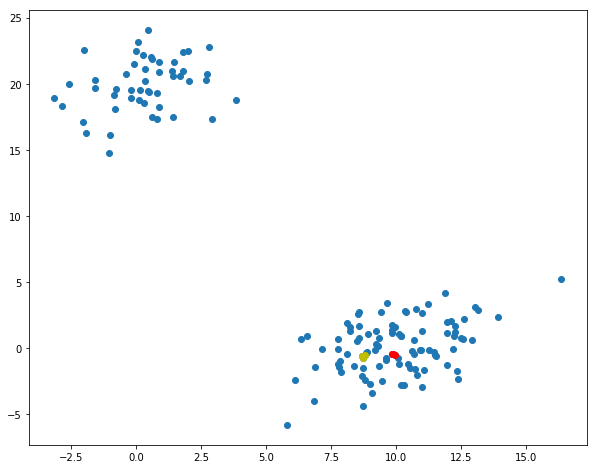

In [40]:
idx = [33,62,68]
idx2 = [15,69,41]
plt.figure(figsize=(10,8))
plt.scatter(X[:,0],X[:,1]) # pintar todos los puntos
plt.scatter(X[idx,0], X[idx,1], c = 'r') # pintar los valores a comprobar
plt.scatter(X[idx2,0], X[idx2,1], c = 'y') # pintar los valores a comprobar
plt.show()

### Representación gráfica de un dendrograma

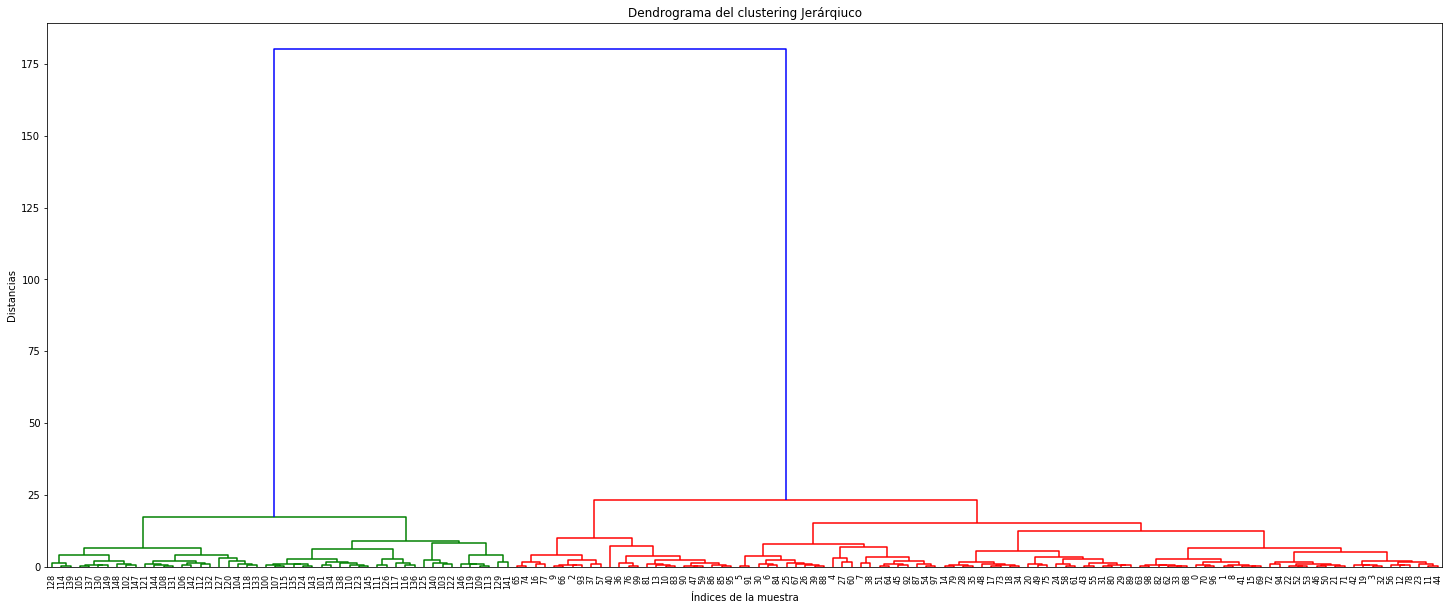

In [41]:
plt.figure(figsize=(25,10))
plt.title('Dendrograma del clustering Jerárqiuco')
plt.xlabel('Índices de la muestra')
plt.ylabel('Distancias')
dendrogram(Z, leaf_rotation=90.,leaf_font_size=8)
plt.show()

Podemos comprobar como las últimas uniones que se reflejan en `Z` son las de mayor distancia, incluyendo los 180 del último grupo.

In [42]:
Z[-4:,]

array([[290.        , 294.        ,  15.11533118,  76.        ],
       [287.        , 292.        ,  17.11527362,  50.        ],
       [293.        , 295.        ,  23.12198936, 100.        ],
       [296.        , 297.        , 180.27043021, 150.        ]])

A la hora de representar el clustering, podemos pasar como argumento `color_threshold`. Este por defecto se establece en un 70% de la distancia global intraclusters (distancia de la última unión), pero podemos variarlo en el caso de que queramos que aparezcan más grupos representados en el gráfico.

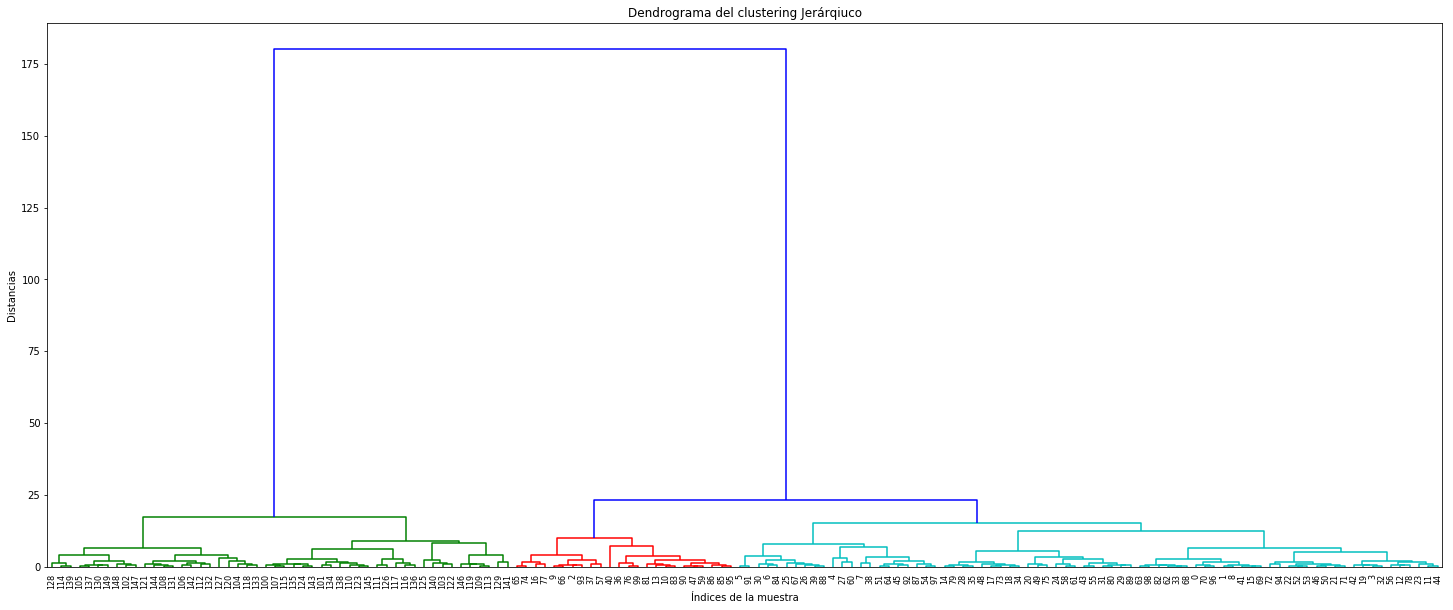

In [43]:
plt.figure(figsize=(25,10))
plt.title('Dendrograma del clustering Jerárqiuco')
plt.xlabel('Índices de la muestra')
plt.ylabel('Distancias')
dendrogram(Z, leaf_rotation=90.,leaf_font_size=8, color_threshold=0.1*180)
plt.show()

### Truncar el dendrograma

Con una mayor cantidad de datos podemos deberemos simplificar el resultado. Esto se consigue truncando el dendrograma.

Los parámetros que podemos usar son los siguientes:
* `truncate_mode`: para indicar los elementos a eliminar de la representación. Le pasaremos el valor `lasp` para indicarle los últimos `p` elementos que queremos truncar del dendrograma
* `p`: la cantidad de elementos a truncar del dendrograma. Es decir, nos mostrará los últimos `p` elementos que han sido unidos en el clusteirng.
* `show_leaf_count`: lo pasamos como `False` para ocultar los nodos hoja. Al pasar el siguiente parámetro, será interesante dejar este en `True`, así que aparecerá el número de elementos en cada una de las ramas contraidas.
* `show_contracted`: para mostrar una distribución contraida en las ramas. Aunque pueda parecer un poco engorroso, sirve para poder ver el peso y los elementos de cada grupo en las uniones que se muestran

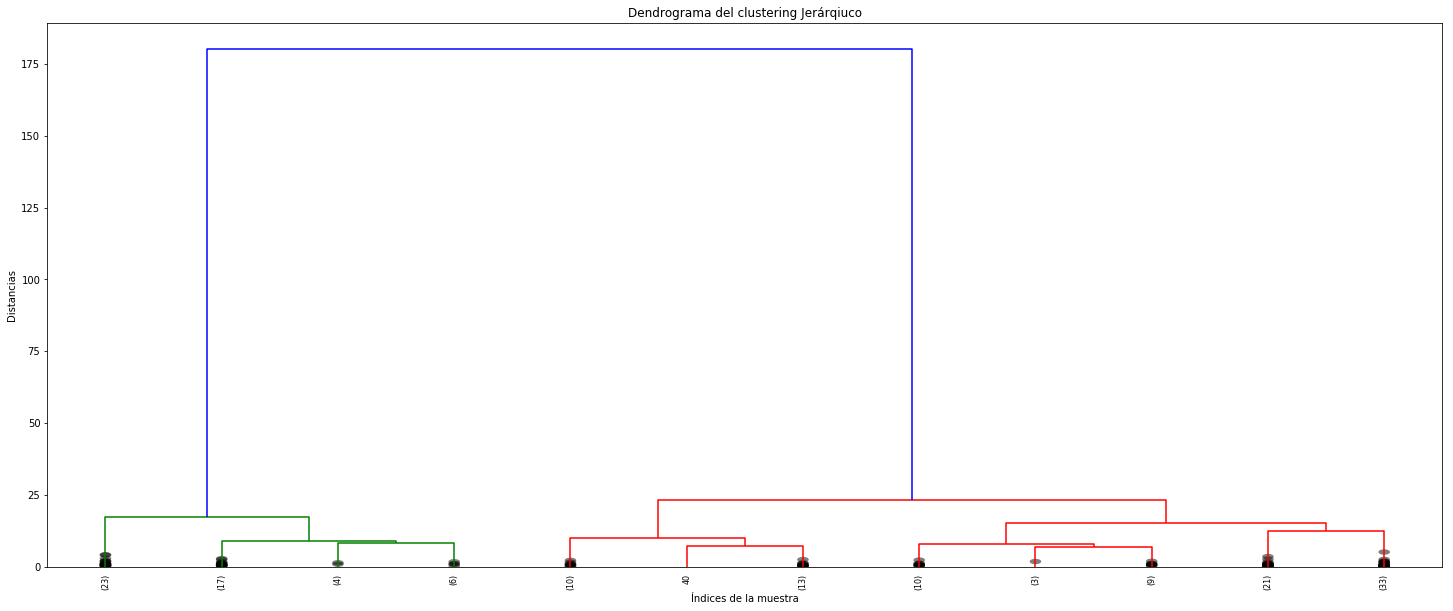

In [46]:
plt.figure(figsize=(25,10))
plt.title('Dendrograma del clustering Jerárqiuco')
plt.xlabel('Índices de la muestra')
plt.ylabel('Distancias')
dendrogram(Z, leaf_rotation=90., leaf_font_size=8, 
           truncate_mode='lastp',p=12, show_leaf_counts=True,
          show_contracted=True)
plt.show()

Como vemos en el plot, el único elemento que queda por unir tras hacer 12 agrupaciones es el elemento número 40.

### Dendrograma tuneado

Otro upgrade que podemos hacerle al dendrograma es añadir un punto en cada unión que indique la distancia de unión, para que sea más sencillo de leer a simple vista.

Para ello creamos una función con las siguientes condiciones:
* Le dejaremos parámetros por defecto con `*args`, en este caso de la función `dendrogram`
* Le pasaremos parámetros opcionales que nosotros mismos crearemos. Crearemos: 
    * `annotate_above` para indicarle el número de grupos a partir del cual queremos que nos indique numéricamente la distancia
    * `max_d`: para indicarle la distancia a la que dibujar una línea horizontal que corte el dendrograma. En la función que definimos, este pasa a ser el valor para el parámetro `color_threshold` de la función `dendrogram`.
* Definimos los parámetros opcionales con `kwargs.pop('__nombre del parámetro__', __valor por defecto__)`

In [64]:
def dendrogram_tuned(*args,**kwargs):
    max_d=kwargs.pop("max_d",None)
    if max_d and 'color_threshold' not in kwargs:
        kwargs['color_threshold'] = max_d
    annotate_above = kwargs.pop('annotate_above',0)
    
    ddata = dendrogram(*args, **kwargs)
    # Guardamos en ddata la información que se crea al generar el dendrograma -->
    # icoord, dcoord, ivl, color_list, etc. los podemos ver haciendo un print(ddata)
    # print(ddata)
    
    if not kwargs.get('no_plot', False):
        plt.title("Clustering jerárquico con Dendrograma truncado")
        plt.xlabel("Índice del Dataset (o tamaño del cluster)")
        plt.ylabel("Distancia")
        # Con el índice, la distancia y el color
        for i, d, c in zip(ddata['icoord'],ddata['dcoord'],ddata['color_list']):
            x = 0.5 * sum(i[1:3])
            y = d[1]
            if y>annotate_above:
                plt.plot(x,y,'o',c=c)
                plt.annotate('%.3g'%y, (x,y), xytext = (0,-5),
                            textcoords = 'offset points', va='top',ha='center')
    if max_d:
        plt.axhline(y=max_d, c = 'k')
    
    return ddata

Si le indicamos `annotate_above`.

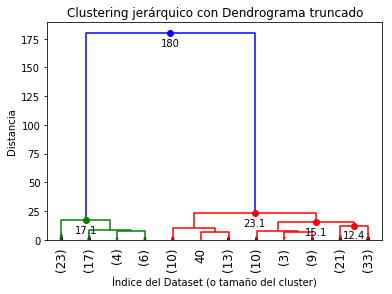

In [65]:
dendrogram_tuned(Z,truncate_mode='lastp',p=12,
                leaf_rotation = 90., leaf_font_size=12.,
                show_contracted=True, annotate_above = 10)
plt.show()

Si no le indicamos `annotate_above`.

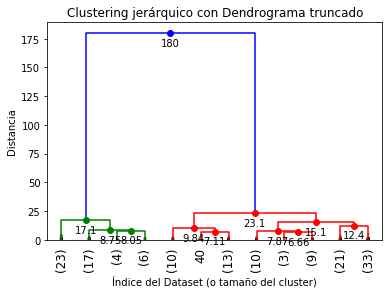

In [66]:
dendrogram_tuned(Z,truncate_mode='lastp',p=12,
                leaf_rotation = 90., leaf_font_size=12.,
                show_contracted=True)
plt.show()

Si le indicamos `max_d`.

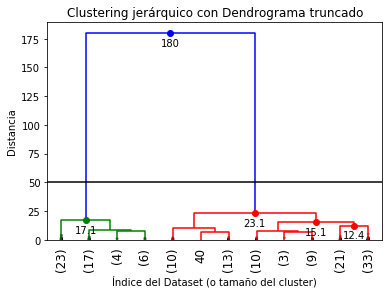

In [69]:
dendrogram_tuned(Z,truncate_mode='lastp',p=12,
                leaf_rotation = 90., leaf_font_size=12.,
                show_contracted=True, annotate_above = 10, max_d = 50)
plt.show()

Si le indicamos `max_d = 20`, al cortar 3 ramas, el dendrograma pasa automáticamente a tener 3 colores por como hemos definido la función.

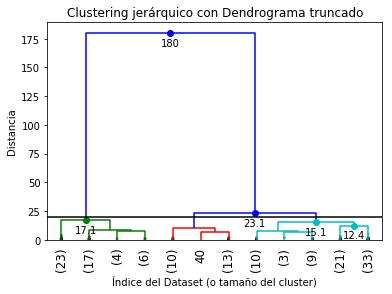

In [68]:
dendrogram_tuned(Z,truncate_mode='lastp',p=12,
                leaf_rotation = 90., leaf_font_size=12.,
                show_contracted=True, annotate_above = 10, max_d = 20)
plt.show()

## Corte automático del dendrograma

El método que utiliza Python por defecto para realizar un corte automático del dendrograma se basa en normalizar las distancias de los grupos conocidas como `h` en tantos niveles de profundidad anteriores como indiquemos con el parámetro `depth`. 

Este método se conoce como **índice de inconsistencia** y viene definido por la siguiente función.

$inconsistency_i = \frac{(h_j - \overline h_j)}{std(h_j)}$

Es decir, el índice normaliza cada uno de los nuevos clusters formados respecto a los `depth` anteriores ($\overline h_j$ y $std(h_j)$ depende, por tanto, de los niveles de profundidad que elijamos).

Si indicamos un nivel de profundidad `depth` de 5:

In [77]:
from scipy.cluster.hierarchy import inconsistent
depth = 5
incons = inconsistent(Z, depth)
print(incons[-10:])

[[ 1.80874989  2.17061644 10.          2.44276733]
 [ 2.31731998  2.19649179 16.          2.52742372]
 [ 2.24511599  2.44225327  9.          2.37659088]
 [ 2.30462321  2.44191287 21.          2.6387508 ]
 [ 2.20673283  2.68378067 17.          2.84581581]
 [ 1.95309037  2.58100378 29.          4.05821033]
 [ 3.46173275  3.53735716 28.          3.29443647]
 [ 3.15857131  3.54836284 28.          3.93327935]
 [ 4.90210137  5.10301603 28.          3.57041559]
 [12.12200256 32.15467931 30.          5.22936105]]


En este nuevo array aparecen los indices de inconsistencia en la última columna. 

Vemos como el último valor tiene un salto de 5 puntos.

Mientras que si definimos un nivel de profundidad `3`.

In [78]:
depth = 3
incons = inconsistent(Z, depth)
print(incons[-10:])

[[ 3.63777835  2.5556114   4.          1.35908084]
 [ 3.89767268  2.57216151  7.          1.54388156]
 [ 3.05885714  2.66707272  6.          1.87115096]
 [ 4.92746418  2.73259589  7.          1.39821573]
 [ 4.76943311  3.16276553  6.          1.60455941]
 [ 5.27287862  3.56604844  7.          2.00627335]
 [ 8.22057081  4.07583053  7.          1.69162096]
 [ 7.83287032  4.46681266  7.          2.07808207]
 [11.38091435  6.29430022  7.          1.86535033]
 [37.25844589 63.31539362  7.          2.25872377]]


Vemos como la media y la desviación típica disminuyen, y que el índice ahora es mucho menor.

En definitiva, este índice es altamente dependiente de la profundidad a la que hayamos elegido realizar la normalización.

Otro déficit de este método es que las uniones o niveles de profundidad no estarán distribuidos como una normal: al principio las uniones se dan con unas `h` mucho más pequeñas que al final.

### Método del codo

Se busca el nñumero de grupos en el escalón del clustering donde la aceleración de la distancia es mayor. Es decir, el mayor codo que se puede generar cuando dibujamos la línea de los incrementos de las distancias de un cluster a otro.

[180.27043021  23.12198936  17.11527362  15.11533118  12.42734657
   9.84427829   8.74822275   8.04935282   7.86878542   7.11106083]


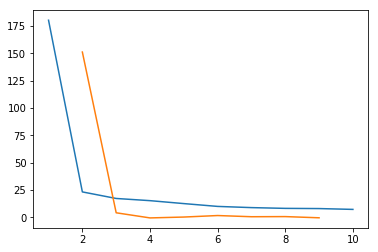

El número óptimo de clusters es 2


In [84]:
# Tomo las últimas uniones del clustering
last = Z[-10:,2]
# revertimos el orden
last_rev = last[::-1] 
print(last_rev)
# Elijo los índices para dibujar el plot con np.arange
# np.arange Return evenly spaced values within a given interval
idx = np.arange(1,len(last) + 1) # +1 porque len(Z) = len(X)-1
# Dibujo las distancias de clustering
plt.plot(idx,last_rev)

## Calculamos las aceleraciones
# Le paso n=2 para que calcule las diferencias de 2 en 2 elementos
acc = np.diff(last_rev,2)
# Al dibujarlos quito los 2 últimos índices (len(acc)=len(last_rev)-2) y los deplazo uno a la derecha
plt.plot(idx[:-2]+1, acc)
plt.show()
# argmax devuelve el índice del mayor elemento dentro del array (0)
# sumo 2 porque el número de clusters se encunetra 2 posiciones a la derecha del valor máximo de acc
k = acc.argmax() + 2
print('El número óptimo de clusters es ' + str(k))

* Es un método muy visual y por tanto, efectivo a la hora de transmitir el trabajo
* Siempre se necesitan, al menos, 2 clusters
* Nunca podremos llegar a la conclusión de que toda la información debe estar en un único cluster
* Al tomar solo las `d` últimas uniones que se producen en el clústering, podemos estar perdiendo uniones de ramas intermedias

Veamos como falla si añadimos dos distribuciones más.

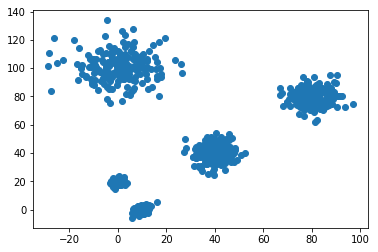

In [87]:
c = np.random.multivariate_normal([40,40],[[20,1],[1,30]], size = [200,])
d = np.random.multivariate_normal([80,80],[[30,1],[1,30]], size = [200,])
e = np.random.multivariate_normal([0,100],[[100,1],[1,100]], size = [200,])
X2 = np.concatenate((X,c,d,e),)
plt.scatter(X2[:,0], X2[:,1])
plt.show()

Vemos como los datos son menos dispersos a menor `sd`.

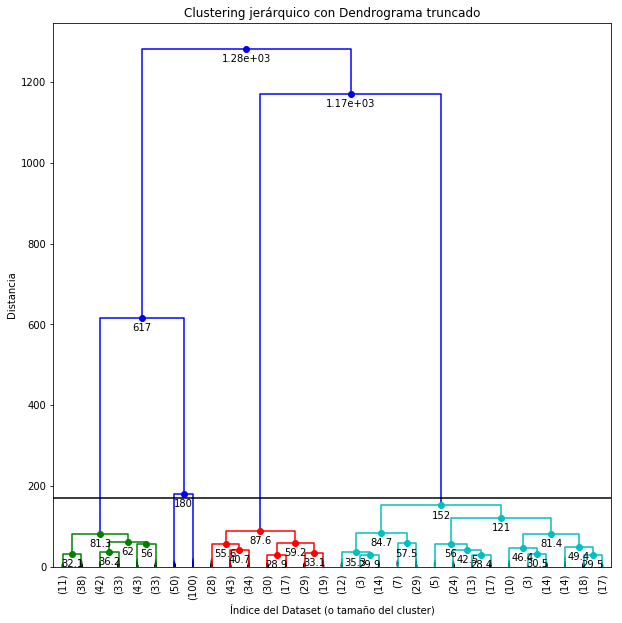

In [91]:
Z2 = linkage(X2, 'ward')
plt.figure(figsize=(10,10))
dendrogram_tuned(
    Z2,
    truncate_mode = 'lastp',
    p = 30,
    leaf_rotation = 90.,
    leaf_font_size = 10.,
    show_contracted = True,
    max_d = 170
)

plt.show()

[1282.46706354 1170.98586166  616.54762239  180.27043021  151.60666456
  121.12826348   87.63025871   84.6531831    81.40781749   81.26914533]


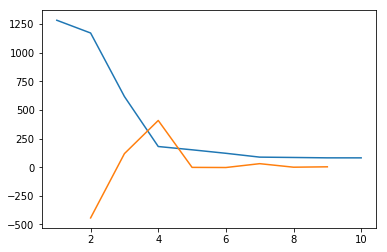

El número óptimo de clusters es 4


In [92]:
# Tomo las últimas uniones del clustering
last = Z2[-10:,2]
# revertimos el orden
last_rev = last[::-1] 
print(last_rev)
# Elijo los índices para dibujar el plot con np.arange
# np.arange Return evenly spaced values within a given interval
idx = np.arange(1,len(last) + 1) # +1 porque len(Z) = len(X)-1
# Dibujo las distancias de clustering
plt.plot(idx,last_rev)

## Calculamos las aceleraciones
# Le paso n=2 para que calcule las diferencias de 2 en 2 elementos
acc = np.diff(last_rev,2)
# Al dibujarlos quito los 2 últimos índices (len(acc)=len(last_rev)-2) y los deplazo uno a la derecha
plt.plot(idx[:-2]+1, acc)
plt.show()
# argmax devuelve el índice del mayor elemento dentro del array (0)
# sumo 2 porque el número de clusters se encunetra 2 posiciones a la derecha del valor máximo de acc
k = acc.argmax() + 2
print('El número óptimo de clusters es ' + str(k))

Vemos que, efectivamente, la desaceleración máxima se produce para 4 clusters.

Sin embargo, esta clasificación no resulta adecuada puesto que, si vemos el scatterplot, veremos 5 grupos claramente diferenciados. 

La conclusión es que hay que usar estas herramientas siempre con precaución y dándole el sentido dentro del contexto de los datos que se estén analizando. Siempre es una buena opción acudir al experto que facilita los datos para corroborar las técnicas estadísticas con el criterio profesional.

## Visualización final del clustering

### Recuperación los clusters y sus elementos

Tomaremos el primer grupo de datos para este análisis. 

Si volvemos al plot, vemos que la distancia a la que se corta el dendrograma para formar 3 grupos está encerrada entre 17 y 23.

In [94]:
from scipy.cluster.hierarchy import fcluster
max_d = 20
# Crea un array en el que se indica a qué grupo pertenece cada elemento
clusters = fcluster(Z, max_d, criterion = 'distance')

array([3, 3, 2, 3, 3, 3, 3, 3, 3, 2, 2, 3, 3, 2, 3, 3, 2, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 2, 2, 3, 3, 2, 3, 3, 3,
       3, 3, 3, 2, 3, 3, 3, 3, 3, 3, 3, 3, 3, 2, 3, 2, 3, 3, 3, 3, 3, 2,
       2, 3, 3, 3, 3, 3, 3, 3, 2, 3, 2, 2, 3, 3, 3, 2, 3, 2, 3, 2, 2, 3,
       3, 3, 2, 3, 3, 2, 3, 2, 3, 3, 3, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1], dtype=int32)

También podemos indicar directamente el número máximo de clusters que queremos, con lo que obtendremos le mismo resultado.

In [95]:
k=3
clusters = fcluster(Z, k, criterion = 'maxclust')
clusters

array([3, 3, 2, 3, 3, 3, 3, 3, 3, 2, 2, 3, 3, 2, 3, 3, 2, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 2, 2, 3, 3, 2, 3, 3, 3,
       3, 3, 3, 2, 3, 3, 3, 3, 3, 3, 3, 3, 3, 2, 3, 2, 3, 3, 3, 3, 3, 2,
       2, 3, 3, 3, 3, 3, 3, 3, 2, 3, 2, 2, 3, 3, 3, 2, 3, 2, 3, 2, 2, 3,
       3, 3, 2, 3, 3, 2, 3, 2, 3, 3, 3, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1], dtype=int32)

Lo podemos hacer de manera automatizada desde un principio pasando el número mínimo de elementos para cada cluster y el parámetro de la profundidad máxima para el cáculo del indice de inconsistencia.

Este método es el que viene por defecto en python.

Veremos que de esta manera solo aparecen 2 grupos.

In [96]:
fcluster(Z, 8, depth = 10)

array([2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1], dtype=int32)

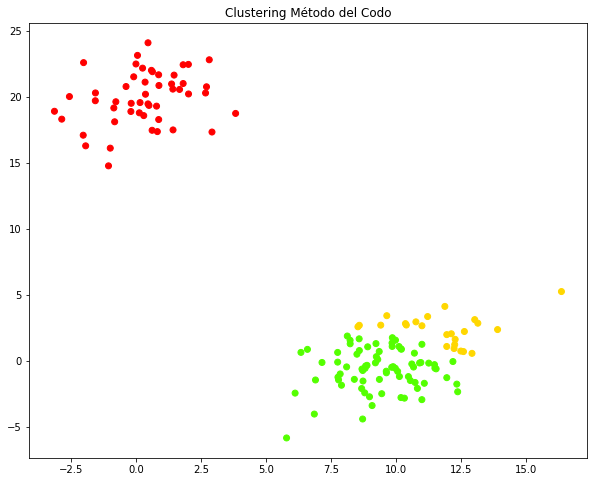

In [98]:
plt.figure(figsize=(10,8))
plt.scatter(X[:,0],X[:,1], c = clusters, cmap = 'prism')
plt.title('Clustering Método del Codo')
plt.show()

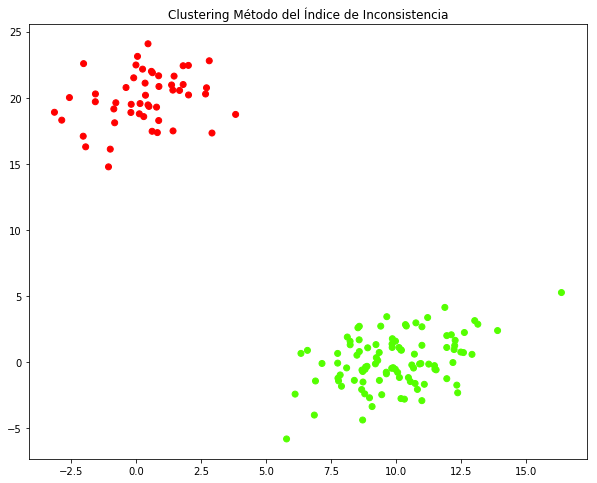

In [100]:
plt.figure(figsize=(10,8))
plt.scatter(X[:,0],X[:,1], c = fcluster(Z, 8, depth = 10), cmap = 'prism')
plt.title('Clustering Método del Índice de Inconsistencia')
plt.show()

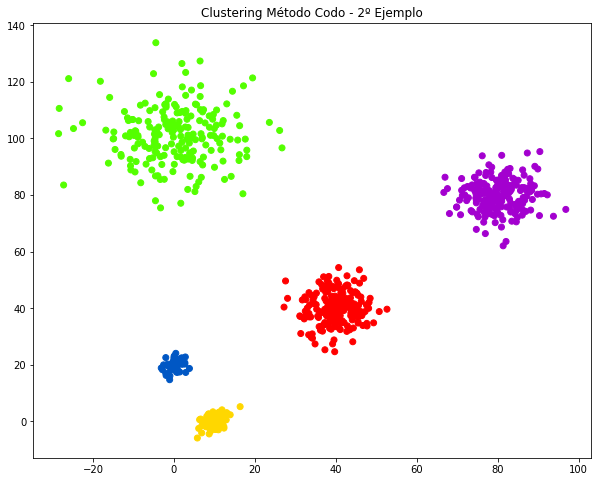

In [105]:
max_d = 170
cluster = fcluster(Z2, max_d, criterion = 'distance')
plt.figure(figsize=(10,8))
plt.scatter(X2[:,0],X2[:,1], c = cluster, cmap = 'prism')
plt.title('Clustering Método Codo - 2º Ejemplo')
plt.show()